Parametric Test Example

In [6]:
import numpy as np

measurements = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
                     157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146, 
                     203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 
                     110, 216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 
                     121, 120])

measurements[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [7]:
import pandas as pd
meas_df = pd.DataFrame(measurements)
meas_df.head()

,0
0,17
1,160
2,234
3,149
4,145


In [8]:
meas_df.describe()

,0
count,50.000000
mean,154.380000
std,50.774367
min,17.000000
25%,120.250000
50%,154.500000
75%,194.750000
max,251.000000


Single Sample T Test
hypotheses

<Axes: ylabel='Frequency'>

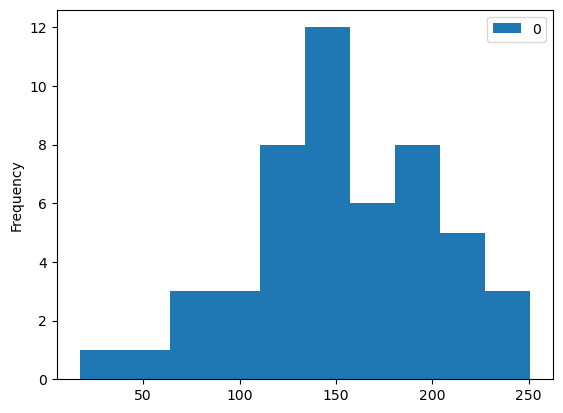

In [ ]:
#hist
meas_df.plot.hist()

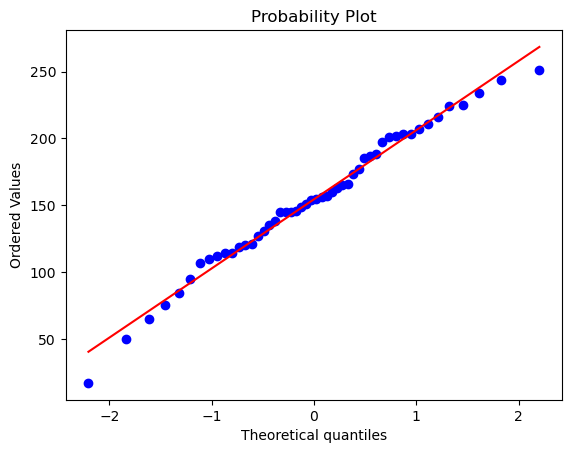

In [10]:
#qqPlot
import scipy.stats as stats
import pylab
stats.probplot(measurements, dist = "norm", plot=pylab)
pylab.show()

##Looking at the visualization it is close to a normal distribution

Shapiro-Wilks Test

In [ ]:
from scipy.stats import shapiro
print("T calc stat: " , shapiro(meas_df)[0])
print("p-value: " , shapiro(meas_df)[1])

T calc stat:  0.9853103897061022
p-value:  0.7848671719373956


Hypothesis Test

H0: average time spent on website is 170  (mean = 170)

H0: average time spent on website is not 170 (mean != 170)

In [17]:
stats.ttest_1samp(meas_df, popmean=170)

TtestResult(statistic=array([-2.1753118]), pvalue=array([0.03446042]), df=array([49]))

p-value < 0.05 so, H0 is rejected. mean is not 170.

<h4> SINGLE SAMPLE RATIO TEST </h4>

Advertisement example -> conversion rate is 0.125 but the company wants to check it. Because it is huge ratio and does not match income.
<hr>
500 views, 40 clicked

conversion rate is 0.08

H0: P = 0.125 

H1: P != 0.125

In [1]:
from statsmodels.stats.proportion import proportions_ztest

In [2]:
count = 40
nobs = 500
value = 0.125

proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

p-value < 0.05 so, H0 rejected.

<h4>Independent Two Samples Test</h4>

Example: The company invests ML project. They wants to test income diff between old system and the new ML system.

A old system

B new ML system

H0: Mean1 = mean2
H1: Mean1 != mean2

In [ ]:
#data type 1
import pandas as pd

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 
                  23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 32, 
                  31, 31, 27, 32, 33, 33, 31, 32, 33, 26, 32, 33, 29])

A_B = pd.concat([A, B], axis=1)
A_B.columns = ["A", "B"]

A_B.head()


,A,B
0,30,37.0
1,27,39.0
2,21,31.0
3,27,31.0
4,29,34.0


In [9]:
import numpy as np
import pandas as pd

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 
                  23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 32, 
                  31, 31, 27, 32, 33, 33, 31, 32, 33, 26, 32, 33, 29])

# A and A's group
GROUP_A = pd.DataFrame(["A"] * len(A), dtype="str")  # Explicitly cast to string
A = pd.concat([A, GROUP_A], axis=1)

# B and B's group
GROUP_B = pd.DataFrame(["B"] * len(B), dtype="str")  # Explicitly cast to string
B = pd.concat([B, GROUP_B], axis=1)

AB = pd.concat([A, B])
AB.columns = ["Income", "Group"]
print(AB.head())
print(AB.tail())

   Income Group
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    Income Group
24      33     B
25      26     B
26      32     B
27      33     B
28      29     B


<Axes: xlabel='Group', ylabel='Income'>

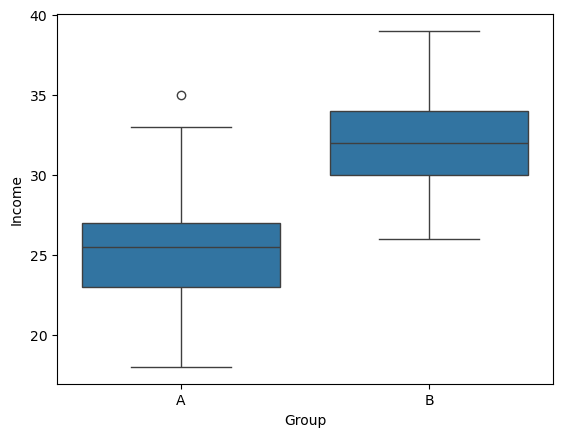

In [11]:
import seaborn as sns
sns.boxplot(x="Group", y = "Income", data=AB)

In [29]:
#Normally Hypothesis
from scipy.stats import shapiro

shapiro(A_B.A.dropna())

ShapiroResult(statistic=0.97892437099949, pvalue=0.7962848069993307)

In [28]:
shapiro(A_B.B.dropna())

ShapiroResult(statistic=0.9538161427733427, pvalue=0.2296465874794938)

A and B are normal distribution

In [33]:
#variance homogenic hypothesis
from scipy import stats
stats.levene(A_B.A.dropna(), A_B.B.dropna())

LeveneResult(statistic=0.8981532064729778, pvalue=0.3472780856708625)

variance is homogenic is not rejected.

In [35]:
#Hypothesis test

stats.ttest_ind(A_B["A"].dropna(), A_B["B"].dropna(), equal_var=True)

TtestResult(statistic=-6.888372206680519, pvalue=4.881694424880097e-09, df=57.0)

In [36]:
test_stats, p_val = stats.ttest_ind(A_B["A"].dropna(), A_B["B"].dropna(), equal_var=True)
print("test_stats : %.4f, p_value %.4f" % (test_stats, p_val))

test_stats : -6.8884, p_value 0.0000


H0 : M1 = M2 rejected. So, the new ML system is different from the old system.

<h3>Dependent Two Sample Test</h3>

In [46]:
import pandas as pd
#C
before = pd.DataFrame([123, 119, 119, 116, 123, 123, 121, 120, 117, 118, 121, 121, 
                       123, 119, 121, 118, 124, 121, 125, 115, 115, 119, 118, 121, 
                       117, 117, 120, 120, 121, 117, 118, 117, 123, 118, 124, 121, 
                       115, 118, 125, 115])
#D
after = pd.DataFrame([118, 127, 122, 132, 129, 123, 129, 132, 128, 130, 128, 138, 
                        140, 130, 134, 134, 124, 140, 134, 129, 129, 138, 134, 124, 
                        122, 126, 133, 127, 130, 130, 130, 132, 117, 130, 125, 129,
                         133, 120, 127, 123])


In [48]:
#discrete data sets
#data type 1

C_D = pd.concat([before, after], axis=1)
C_D.columns = ["Before", "After"]
C_D.head()

,Before,After
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [50]:
#data type 2
import numpy as np
# Before and Before's group
GROUP_BEFORE = pd.DataFrame(["Before"] * len(before), dtype="str")  # Explicitly cast to string
C = pd.concat([before, GROUP_BEFORE], axis=1)

# After and After's group
GROUP_AFTER = pd.DataFrame(["After"] * len(after), dtype="str")  # Explicitly cast to string
D = pd.concat([after, GROUP_AFTER], axis=1)

# Combine before and after data
CD = pd.concat([C, D])
CD.columns = ["Performance", "b_a"]

print(CD.head())
print(CD.tail())

   Performance     b_a
0          123  Before
1          119  Before
2          119  Before
3          116  Before
4          123  Before
    Performance    b_a
35          129  After
36          133  After
37          120  After
38          127  After
39          123  After


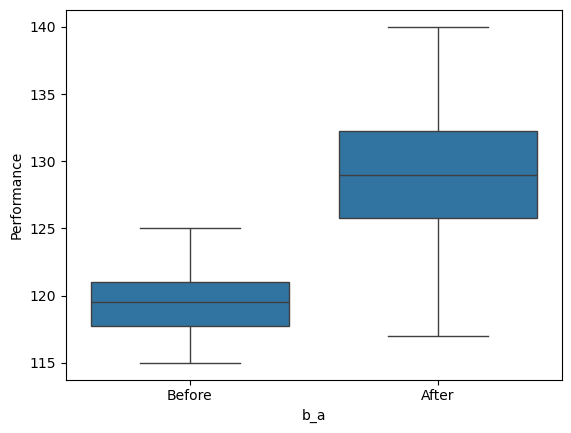

In [51]:
import seaborn as sns
sns.boxplot(x="b_a", y="Performance", data=CD);

In [52]:
#Assumption Control(hypothesis)

from scipy.stats import shapiro

shapiro(C_D.Before)

ShapiroResult(statistic=0.9543651286601341, pvalue=0.10722012473424775)

In [53]:
shapiro(C_D.After)

ShapiroResult(statistic=0.9780089132335147, pvalue=0.6159508885102487)

h0 is not rejected. so, theoric and sample distribution have no diff.(Normal Dist.)

In [55]:
import scipy.stats as stats
stats.levene(C_D.Before, C_D.After)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

p_val < 0.05 so Variance assumption is rejected. But for now, we will ignore this hypothesis.

In [ ]:
#Hypothesis test
stats.ttest_rel(C_D.Before, C_D.After)

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

p_val < 0.05 so, there is no significant meaningful between before and after.